In [1]:
!pip install cython
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ikk1m8c1
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-ikk1m8c1
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp311-cp311-linux_x86_64.whl size=395987 sha256=fa268b01098cdd826f8b0ad2e5e37abc4df474c2eb3c09fd0c30ea05364d7969
  Stored in directory: /tmp/pip-ephem-wheel-cache-tjfvyn_y/wheels/6d/69/75/358c50a37672dfda8d74ba3b30ec49fb75d52f7c081886d503
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8


# 1. Data Loading

In [2]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2025-05-21 03:44:27--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.214.137, 52.217.97.4, 16.15.200.236, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.214.137|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G   162MB/s    in 3m 14s  

2025-05-21 03:47:41 (95.1 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2025-05-21 03:47:41--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.88, 52.217.204.113, 54.231.165.129, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80

In [ ]:
!mkdir -p /content/coco/train2017 /content/coco/val2017 /content/coco/annotations
!unzip train2017.zip -d /content/coco/train2017
!unzip val2017.zip   -d /content/coco/val2017
!unzip annotations_trainval2017.zip -d /content/coco/annotations

In [26]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [6]:
dataDir = '/content/coco/'
tr_dataType = 'train2017'
annFile = '{}/annotations/annotations/instances_{}.json'.format(dataDir, tr_dataType)

In [7]:
# initialize COCO api for instance annotations
coco = COCO(annFile)

loading annotations into memory...
Done (t=26.39s)
creating index...
index created!


In [8]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush
COCO supercategories: 
outdoor accessory sports animal vehicle furniture food person kitchen appliance electronic indoor


In [21]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/annotations/captions_{}.json'.format(dataDir, tr_dataType)
coco_caps = COCO(annFile)

loading annotations into memory...
Done (t=1.63s)
creating index...
index created!


Image Id: 391895
A man with a red helmet on a small moped on a dirt road. 
Man riding a motor bike on a dirt road on the countryside.
A man riding on the back of a motorcycle.
A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. 
A man in a red shirt and a red hat is on a motorcycle on a hill side.


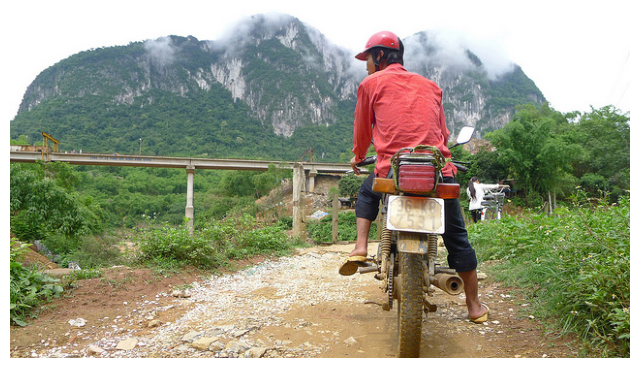

In [33]:
# load and display caption annotations
img_ids = coco_caps.getImgIds()
first_id = img_ids[0]

ann_ids = coco_caps.getAnnIds(imgIds=[first_id])
anns = coco_caps.loadAnns(ann_ids)
print("Image Id:", first_id)

coco_caps.showAnns(anns)
imgDir = '/content/coco/train2017/train2017'
img_meta = coco.loadImgs([first_id])[0]
I = io.imread(os.path.join(imgDir, img_meta['file_name']))
plt.imshow(I); plt.axis('off'); plt.show()